# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Assignment  67: Ensemble Techniques 4 - Utkarsh Gaikwad</p>

[Assignment pdf link](14%20Apr_AssQ.pdf)

### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link : [https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link](https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link)


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 1</p>

## Queston 1 : Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary
---

## Answer :

### Step 1 : Read the dataset and check its basic information

In [1]:
import pandas as pd
df = pd.read_csv('./dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.shape

(303, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Step 2 : Check Missing Values in Dataset 

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### No Null Values found in dataset

### Step 3 : Dataset Description

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.nunique().sort_values()

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

### No Encoding is required as all dataypes are already in numerical format also random forest does not require feature scaling

### Step 4 : Seperating X and Y variables 

In [7]:
X = df.drop(labels=['target'],axis=1)
Y = df[['target']]

In [8]:
Y.value_counts()

target
1         165
0         138
dtype: int64

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 2</p>

## Question 2 : Split the dataset into a training set (70%) and a test set (30%).
---

## Answer :

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [10]:
xtrain.shape

(212, 13)

In [11]:
xtest.shape

(91, 13)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 3</p>

## Question 3 : Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.
---

## Answer :

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(xtrain,ytrain.values.flatten())

RandomForestClassifier(max_depth=10)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 4</p>

## Question 4 : Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score
---

## Answer : 

In [13]:
# Creating a function to evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(x,y,model):
    ypred = model.predict(x)
    acc = accuracy_score(y,ypred)
    pre = precision_score(y,ypred)
    rec = recall_score(y,ypred)
    f1 = f1_score(y,ypred)
    print(f'Accuracy Score  : {acc:.4f}')
    print(f'Precision Score : {pre:.4f}')
    print(f'Recall Score    : {rec:.4f}')
    print(f'F1 Score        : {f1:.4f}')
    return acc, pre, rec, f1

In [14]:
# Evaluate model on test data
acc_base, pre_base, rec_base, f1_base = evaluate_model(xtest, ytest, rfc)

Accuracy Score  : 0.8022
Precision Score : 0.8200
Recall Score    : 0.8200
F1 Score        : 0.8200


In [16]:
from sklearn.metrics import classification_report
ypred_test = rfc.predict(xtest)
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



<Axes: >

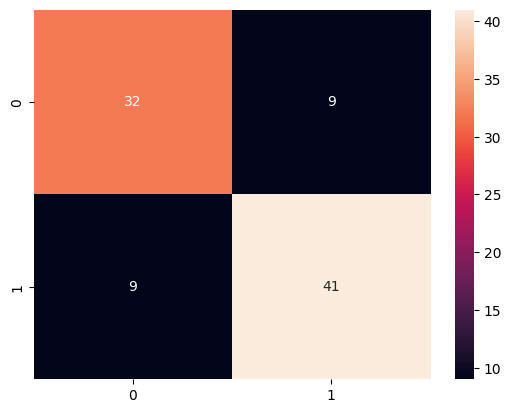

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,ypred_test)
sns.heatmap(cf, annot=True, fmt='d')

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 5</p>

## Question 5 : Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.
---

## Answer :

In [18]:
rfc.feature_importances_

array([0.08679309, 0.02413289, 0.12789861, 0.06893361, 0.06885121,
       0.01121818, 0.01350521, 0.11524388, 0.07047077, 0.10945536,
       0.04820474, 0.1376403 , 0.11765215])

In [19]:
rfc.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [23]:
imp = pd.Series(rfc.feature_importances_)
imp.index = rfc.feature_names_in_
imp = imp.sort_values(ascending=False)
imp

ca          0.137640
cp          0.127899
thal        0.117652
thalach     0.115244
oldpeak     0.109455
age         0.086793
exang       0.070471
trestbps    0.068934
chol        0.068851
slope       0.048205
sex         0.024133
restecg     0.013505
fbs         0.011218
dtype: float64

In [26]:
top5 = list(imp[0:5].index)
print(f'Top 5 features in the data are : {top5}')

Top 5 features in the data are : ['ca', 'cp', 'thal', 'thalach', 'oldpeak']


<Axes: title={'center': 'Feature Importances Plot'}>

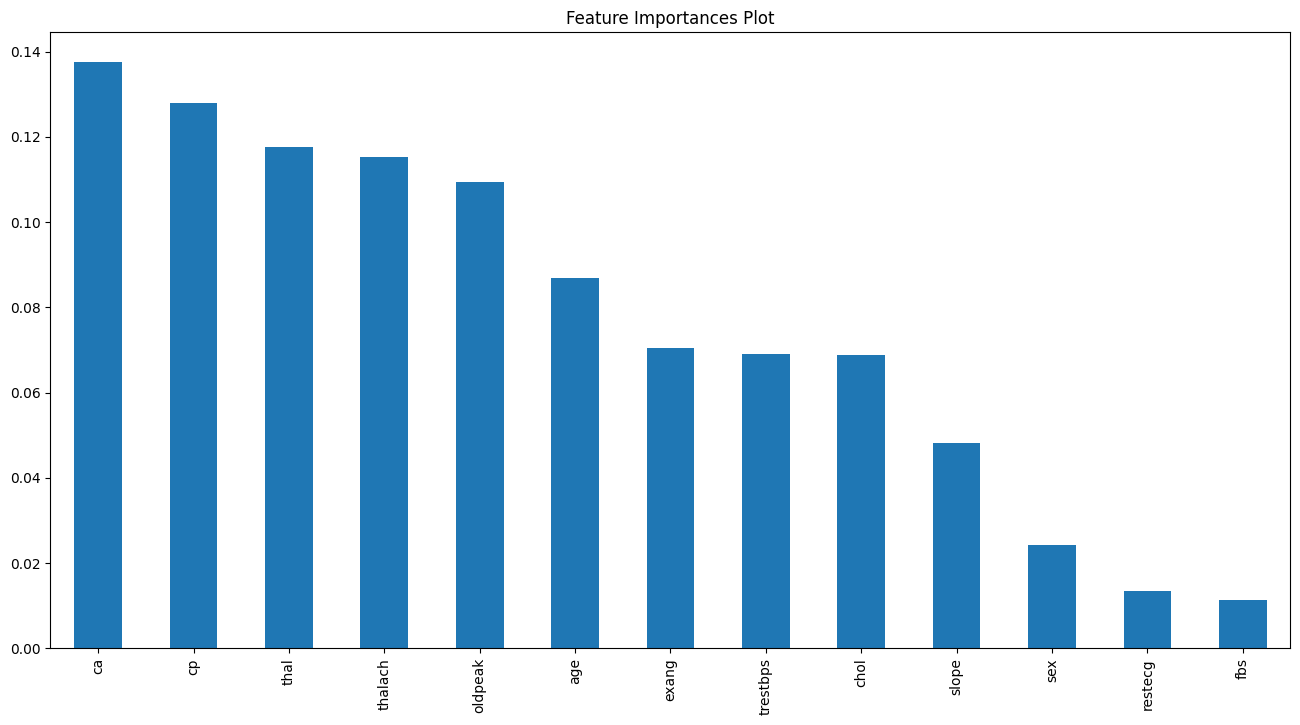

In [31]:
imp.plot(kind='bar',title='Feature Importances Plot', figsize=(16,8))

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 6</p>

## Question 6 : Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
---

## Answer :

In [32]:
# Defining the parameters for tuning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [39]:
# Performing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=5, 
                          scoring='f1',
                          n_iter=50,
                          verbose=3)

In [40]:
rscv.fit(xtrain,ytrain.values.flatten())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.864 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.833 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.731 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.880 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.889 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.760 total time=   0.0s
[CV 4/5] E

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=3)

In [42]:
rscv.best_score_

0.8630861229867441

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 7</p>

## Question 7 : Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.
---

## Answer :

In [47]:
# Best Parameters
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 8}

In [48]:
# Best Estimator (Model)
rscv.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=50)

In [49]:
# Best F1 Score
rscv.best_score_

0.8630861229867441

In [46]:
# Testing Accuracy on tuned model
print('Results for Tuned Model :\n')
acc_tuned, pre_tuned , rec_tuned, f1_tuned = evaluate_model(xtest,ytest.values.flatten(),rscv)

Results for Tuned Model :

Accuracy Score  : 0.8352
Precision Score : 0.8302
Recall Score    : 0.8800
F1 Score        : 0.8544


In [50]:
dct = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[acc_base,pre_base,rec_base,f1_base],
    'tuned model':[acc_tuned,pre_tuned,rec_tuned,f1_tuned]
}

In [51]:
df_compare = pd.DataFrame(dct)
df_compare

,metrics,base model,tuned model
0,accuracy,0.802198,0.835165
1,precision,0.820000,0.830189
2,recall,0.820000,0.880000
3,f1,0.820000,0.854369


### All parameters of the tuned model increases all scores. 

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 8</p>

## Question 8 : Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.
---

## Answer :

In [52]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=50)

In [56]:
imp_tuned = best_rfc.feature_importances_
imp_tuned = pd.Series(imp_tuned)
imp_tuned.index = best_rfc.feature_names_in_
imp_tuned = imp_tuned.sort_values(ascending=False)
imp_tuned

ca          0.174087
cp          0.172375
thal        0.129944
oldpeak     0.109850
exang       0.100620
thalach     0.092619
age         0.054958
chol        0.042937
slope       0.040801
trestbps    0.036456
sex         0.028114
restecg     0.014542
fbs         0.002698
dtype: float64

In [57]:
imp_tuned[0:2]

ca    0.174087
cp    0.172375
dtype: float64

<Axes: title={'center': 'Feature Importances for tuned model'}>

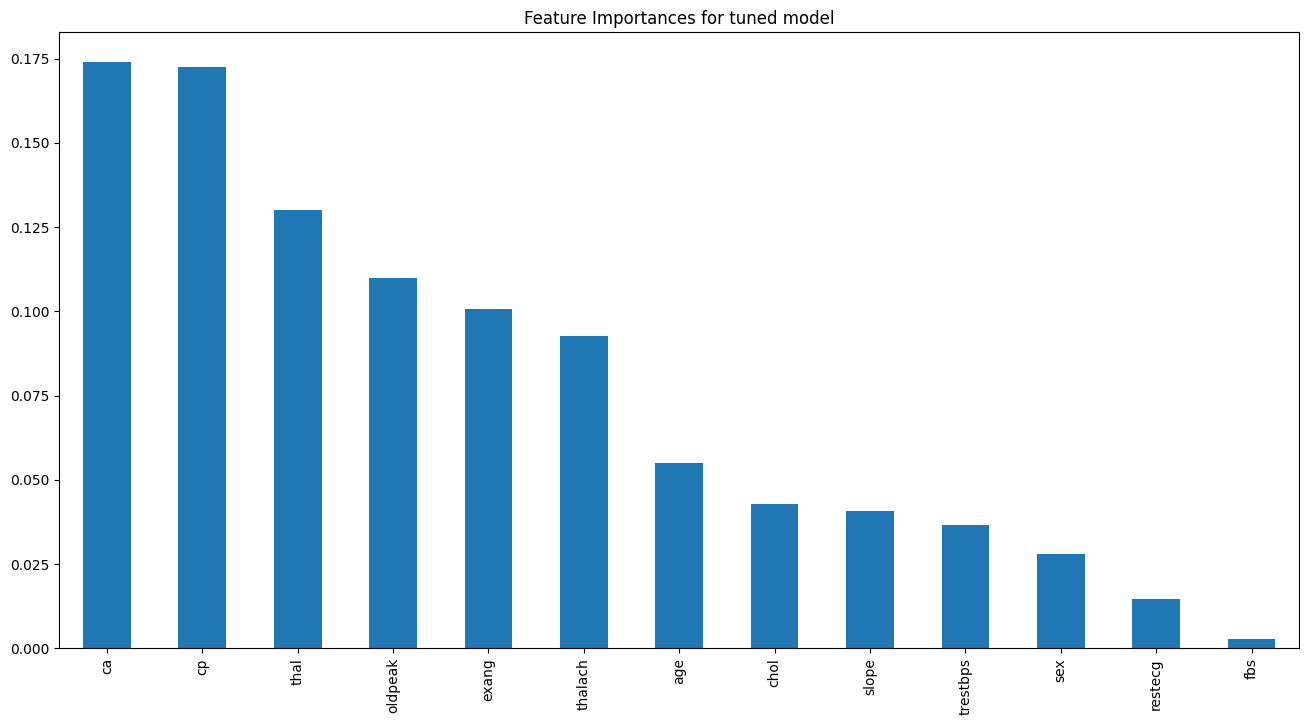

In [58]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))

In [60]:
top2 = xtrain[['ca','cp']]
top2.head()

,ca,cp
124,0,2
72,0,1
15,0,2
10,0,0
163,4,2


In [61]:
df_top2 =pd.concat([top2,ytrain],axis=1)
df_top2.head()

,ca,cp,target
124,0,2,1
72,0,1,1
15,0,2,1
10,0,0,1
163,4,2,1


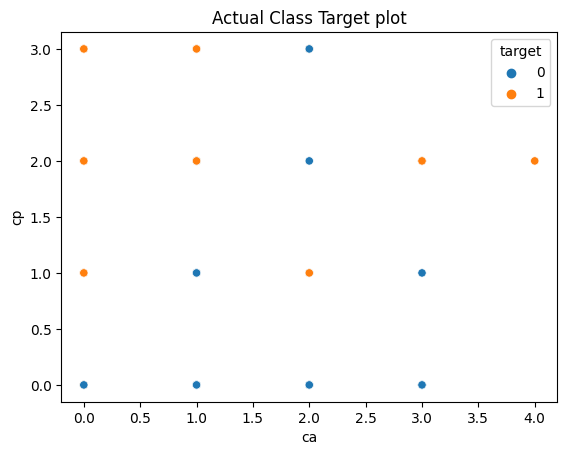

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [70]:
df_top2['predicted'] = best_rfc.predict(xtrain)

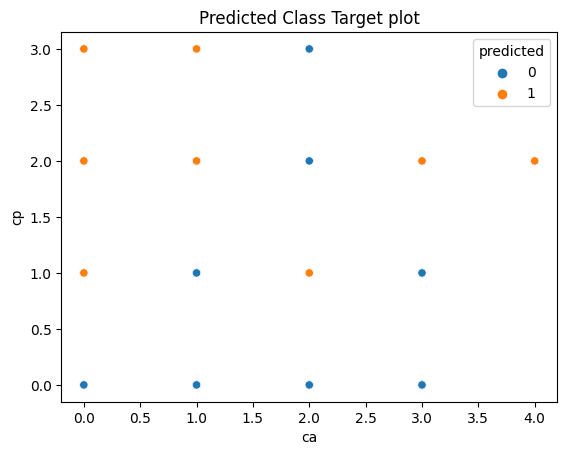

In [71]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()